# Анализ продаж компьютерных игр

__Описание проекта__

__Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».__`

***Цель исследования :
Выявить закономерности определяющие успешности игры***

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импортируем нужные библиотеки
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats as st

In [2]:
# открываем файл csv, называем таблицу data
data = pd.read_csv('/datasets/games.csv')

In [3]:
# выводим первые 30 строк таблицы
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# проверим общую информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


__Первичный анализ показал,что названия столбцов записаны правильно,без лишних пробелов, но нужно привести к нижнему регистру. Так же сменить тип данных в столбцах. А так же проверить таблицу на пропуски и дубликаты, по необходимости избавиться(заменить) от них. Все это будем делать во 2 пункте.__

### Предобработка данных

In [5]:
# приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
# затем проверяем результат изменений 
print(data.columns)
data

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# проверим таблицу на дубликаты
print('Дубликатов оказалось:', data.duplicated().sum())

Дубликатов оказалось: 0


`Дубликатов нет, хорошо`

In [7]:
# проверим пропуски в таблице
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


__Видим,что в столбцах есть пропуски: name(название)-2, year_of_release(дата релиза игры)-269, genre(жанр игр)-2, critic_score(оценки критиков)-8578, user_score(оценки пользователей)-6701, rating(рейтинг игр)-6766. Хотелось бы узнать,какие уникальные значения скрываются в столбцах, метод unique() нам поможет в этом.__

__Возможной причиной пропусков в столбцах critic_score, user_score и rating может быть небольшой объем продаж игр, малый процент пользования. Соответственно, критики и пользователи не ставят оценки, а значит рейтинг отсутствует.__

`Работаем со столбцом critic_score`

In [8]:
# ради интереса гляну уникальные значения
data['critic_score'].unique()
# пропуски трогать не буду.





# так как решили,что оценки нет, значит, можно заполнить пропуски в оценке критиков нулями и привести к целочисленному типу данных (int) 
#data['critic_score'] = data['critic_score'].fillna('0').astype('float').astype('int')
#data['critic_score'] = data['critic_score'].fillna('Nan')
#data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

__Пропуски я решила не трогать, чтоб не исказить дальнейший анализ и не создавать заглушек__

`Переходим к столбцу user_score`

In [9]:
# проверяем на уникальность значений оценок пользователей
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

__Видим,что встречается значение/аббревиатура 'tbd' - to be determined (discussed). Она означает, что оценки пока что нет и можно пропуски заменить на 0, но мы заменим на Nan,чтоб не создавать заглушек__

In [10]:
# заменяем значения 'tbd' на Nan
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
# и сразу меняю тип данных на float
data['user_score'] = data['user_score'].astype(float)
data['user_score']
#data['user_score'] = data['user_score'].fillna('Nan')
#data['user_score'] = pd.Series(map((lambda x: 'Nan' if x == 'tbd' else x), data['user_score']))
#data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [11]:
# теперь приведём user_score к той же шкале оценки, в которой стоит столбец critic_score
#data['user_score'] = data.apply(lambda x: int(x['user_score'] * 10), axis = 1)
#data['user_score']

`Переходим к столбцу rating`

In [12]:
# уникальные значения столбца
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
# так как значения в данном столбце распределены по категориям, то пропуски нужно заменить не на 0, а на, например, No rating.
data['rating'] = data['rating'].fillna('no rating')
data['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [14]:
data['rating'].value_counts()

no rating    6766
E            3990
T            2961
M            1563
E10+         1420
EC              8
RP              3
K-A             3
AO              1
Name: rating, dtype: int64

In [15]:
# вспоминаем таблицу
data.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating


`Работаем со столбцом genre`

In [16]:
# проверяем на уникальность значений
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

`Видим,что есть пропуски в виде nan. Знаем,что их всего два, поэтому выведем строки, в которых встречаются nan`

In [17]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no rating
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no rating


__Упс, обнаружено,что в названии name в тех же строках попались те же пропуски,что и в столбце жанра,да еще и рейтинга нет. Значит, эти строки не особо нам и нужны. Избавимся от них беспощадно!__

In [18]:
data.drop(index = [659, 14244], inplace = True)
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
# проверяем еще раз пропуски
print(data.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64


`Cтолбец year_of_release. Взглянем на него`

In [20]:
# проверим уникальные значения
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

__Обнаружены пропуски nan. Год релиза/выпуска игры нам будет нужен в будущем. Интересно, какой процент от общего количества значений составляют пропуски year_of_release?! И раз уж мы планируем начисто удалять ненужные строки, то следует проверить и их продажи от общего числа. Если процент маленький, то удалим строчки столбца year_of_release с пропусками nan и забудем!__

`Раз уж надо проверить продажи, неплохо было бы вставить в таблицу столбец с общими продажами.`

In [21]:
# посчитаем общие продажи и добавим новый столбец в нашу таблицу. назовем total_sales:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


In [22]:
# а теперь найдем процент продаж столбца year_of_release от общего числа
display(data[data['year_of_release'].isna()==True]['total_sales'].sum()/data['total_sales'].sum())

0.011098034508021166

__Kак видим, проценты пропусков по столбцу year_of_release очень маленькие, всего-то 1.1% и 1,6%. Значит, удаляем лишние строки!__

In [23]:
# всего значений в таблице 16713, а пропусков в столбце-269.Найдем составляющий процент отношением.
#269/16713*100=1,6%

In [24]:
# как видим, проценты пропусков по столбцу year_of_release очень маленькие, всего-то 1.1% и 1,6%. Значит, удаляем лишние строки!  
data.dropna(subset=['year_of_release'], inplace = True)
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [25]:
# год релиза переведем к типу данных int,чтоб красиво было и не смущал ненужный нолик
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

In [26]:
# контрольная проверка пропусков
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64


__Избавились от необходимых для работы пропусков, едем дальше__

__Проверим на уникальность столбцы na_sales, eu_sales, jp_sales, ther_sales__

In [27]:
# проверим уникальные значения и оценим визуально циферки
print('Продажи в Северной Америке', data['na_sales'].unique())

print('Продажи в Европе', data['eu_sales'].unique())

print('Продажи в Японии', data['jp_sales'].unique())

print('Другие продажи', data['other_sales'].unique())


Продажи в Северной Америке [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e+00 6.030e+00 9.700e+00 5.280e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.620e+00 5.030e+00 5.990e+00
 3.960e+00 2.500e+00 7.970e+00 6.910e+00 4.340e+00 4.350e+00 3.010e+00
 6.160e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.010e+00
 6.730e+00 5.950e+00 3.660e+00 5.550e+00 7.040e+00 6.650e+00 3.880e+00
 5.800e+00 4.100e+00 5.930e+00 4.360e+00 5.700e+00 2.030e+00 4.400e+00
 5.050e+00 3.540e+00 1.120e+00 6.820e+00 1.750e+00 3.740e+00 1.060e+00
 2.790e+00 2.910e+00 9.900e-01 2.570e+00 2.990e+00 2.280e+00 7.280e+00
 2.760e+00 2.900e+00 2.810e+00 6.600e-01 3.780e+00 3.270e+00 3.560e+00
 5.390e+00 4.590e+00 4.810e+00 4.460e+00 3.480e+00

__Ничего примечательного я пока не вижу, поэтому эти столбцы не буду трогать. Столбец с общими продажами добавили ранее.__

`Остался столбец platform`

In [28]:
# проверим на уникальность значений, чтоб увидеть какие-нибудь отличия
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

`Ничего удивительного, выдающегося не вижу, поэтому не трогаю этот столбец`

__Промежуточный вывод по предобработке.__
__Итак, наша таблица прошла некоторые этапы очистки:__
- названия столбцов приведены к нижнему регистру;
- пропуски в столбцах оценок критиков и пользователей заменены на нули. Предположительно, отсутствие оценок и рейтинга характеризуется низким объемом продаж;
- столбцы оценок критиков и пользователей приведены к единой оценочной шкале;
- удалены 2 строки, одновременно включающие в себя пропуски в столбцах названия игр, жанра и рейтинга;
- так как процент пропуска в столбце с годом релиза от общего количества всех значений низкий, всего 1,6%. А так же проанализировав и заметив маленький процент продаж от общей суммы по данному столбцу(1.1%), было решено удалить строки с пропусками;
- столбцы с со всеми продажами я не трогала, так как пока не заметила аномалий.

### Исследовательский анализ данных

In [29]:
# вспомним наши данные
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


In [30]:
# посчитаем и выведем количество выпускаемых игр в разные годы.
print('Количество лет:', len(data['year_of_release'].unique()))
print('Количество игр, вышедших в разные годы', data['year_of_release'].value_counts())

Количество лет: 37
Количество игр, вышедших в разные годы 2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64


`Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? Чтобы это узнать, сгруппируем данные`

In [31]:
# создадим небольшой датасет с группировкой количества по году и названию
game_of_year = data.groupby('year_of_release')[['name']].agg('count').reset_index()
# и так как без доп. переменных не обойтись, в нашем мини-датасете создадим столбец с количеством игр 
game_of_year.columns = ['year_of_release', 'count_games_per_year']
game_of_year


,year_of_release,count_games_per_year
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


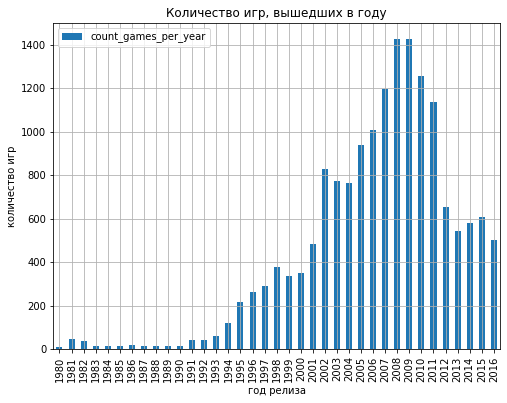

In [32]:
# построим диаграмму и посмотрим тенденцию выпусков игр
game_of_year.plot.bar(x = 'year_of_release', y = 'count_games_per_year', grid=True, title='Количество игр, вышедших в году',
                   figsize=(8,6)).set(xlabel='год релиза', ylabel='количество игр')
plt.show() 

__По диаграмме видно, что начиная с 1991-1992 года количество релизов игр начинает расти. А в 2008-2009 состоялся пик вышедших компьютерных игр, это 1426-1427 релизов в год! Затем медленно выход новых игр пошел на спад, и уже к 2016 году количество релизов составило около 500.
Но так как нас интересуют данные успешных игр,их рост, я думаю, нужно отсеить некоторые периоды. Период с 1980г по 1990г с маленькими показателями по выпуску игр можно убрать, чтоб данные значения не портили нам показатели.__

In [33]:
# отбросим период до 1991 года и проверим таблицу
data = data.query('year_of_release > 1990')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


In [34]:
# здесь в датасете game_of_year тоже отбросим период до 1991 года(на всякий случай)
game_of_year=game_of_year.query('year_of_release > 1990')
game_of_year

,year_of_release,count_games_per_year
11,1991,41
12,1992,43
13,1993,60
14,1994,121
15,1995,219
16,1996,263
17,1997,289
18,1998,379
19,1999,338
20,2000,350


__Исходя из истории видеоигровой индустрии (спасибо, поиск Яндекс), разработка видеоигр на персональные компьютеры началась лишь в 90-х годах. Это начало времени развития цифровых технологий, 3D моделирования и внедрения CD-ROM, появление новых жанров видеоигр. Наша диаграмма подтверждает данный процесс.__

In [35]:
# создадим небольшой датасет platform_sales с группировкой по количеству копий продаж на каждой платформе 
platform_sales = data.groupby('total_sales')[['platform']].agg('count').reset_index()
# столбцы для датасета 
platform_sales.columns = ['total_sales', 'platform']
platform_sales

,total_sales,platform
0,0.00,2
1,0.01,778
2,0.02,1013
3,0.03,793
4,0.04,645
...,...,...
975,29.80,1
976,31.38,1
977,32.77,1
978,35.52,1


In [36]:
# сгруппируем игры по платформам и объемам продаж, датасет game_of_platform
game_of_platform  = data.groupby('platform')['total_sales'].agg(['count', 'sum']
                                    ).sort_values(by='sum', ascending = False).reset_index()
# создадим столбцы для датасета кол-во игр на платформе count_games_on_platform и продажи игр с данной платформы sale_game_of_platform
game_of_platform.columns = ['platform', 'count_games_on_platform', 'sale_game_of_platform']
game_of_platform

,platform,count_games_on_platform,sale_game_of_platform
0,PS2,2127,1233.56
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1286,891.18
4,DS,2120,802.76
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


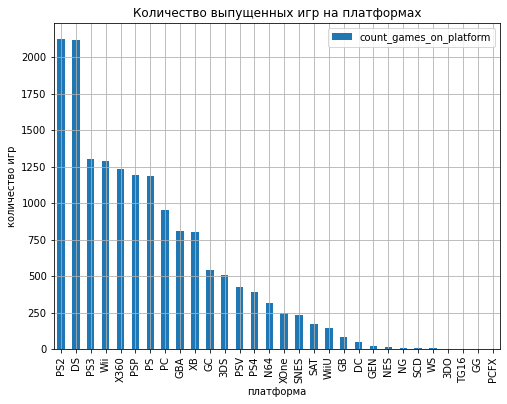

In [37]:
# создадим диаграмму,чтобы посмотреть количества игр на платформах по отдельности
game_of_platform.sort_values(by = 'count_games_on_platform', ascending= False).plot.bar(
                    x = 'platform', y = 'count_games_on_platform', grid=True, 
                    title='Количество выпущенных игр на платформах',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='количество игр')
plt.show() 

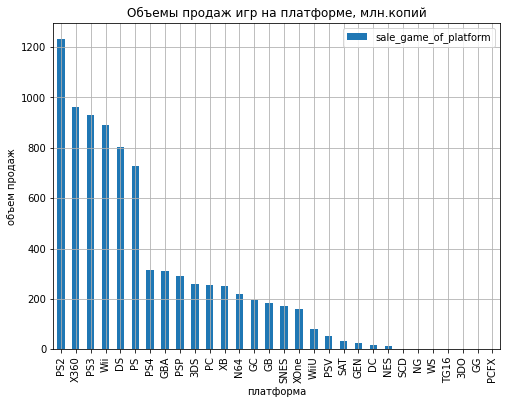

In [38]:
# создадим диаграмму, посмотреть динамику продаж игр на каждой платформе
game_of_platform.plot.bar(
                    x = 'platform', y = 'sale_game_of_platform', grid=True, 
                    title='Объемы продаж игр на платформе, млн.копий',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='объем продаж')
plt.show()

__По диаграммам видно,что лидером продаж является игра PS2. Эту же игру выпустили максимальное количество раз по сравнению с другими. Можно еще сделать круговую диаграмму,чтобы посмотреть наглядно долю каждой игровой платформы.__

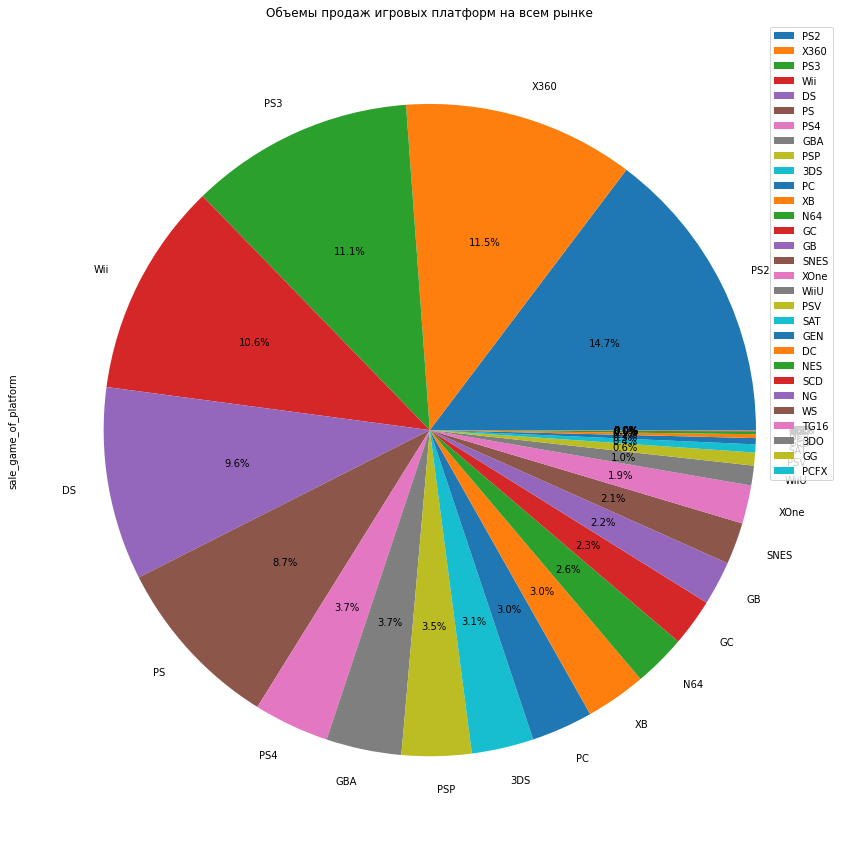

In [39]:
game_of_platform.plot(kind = 'pie', y ='sale_game_of_platform', autopct='%1.1f%%', figsize= (15,15),
                         title = 'Объемы продаж игровых платформ на всем рынке', labels = game_of_platform['platform'])
plt.show() 

__Видно на диаграммах, что самый большой процент продаж имеет игра PS2(14.7%). Выделяются с большим объемом продаж еще 5 игровых платформ-это X360,PS3,Wii,DS и PS. А самыми малопродаваемыми оказались игры GG,3DO,PCFX(приблизительно по 2%). И с почти одинаковым объемом продаж носу-к-носу (≈3-4%) идут игры PS4,GBA,PSP,3DS,PC,XB.__

`Надо бы выделить горячую шестерку и отобразить на графике, а остальное отбросить,т.к.показатели низкие.`

In [40]:
# выведем наших первых 6 лидеров
top_6_platform = game_of_platform.head(6)['platform']
top_6_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

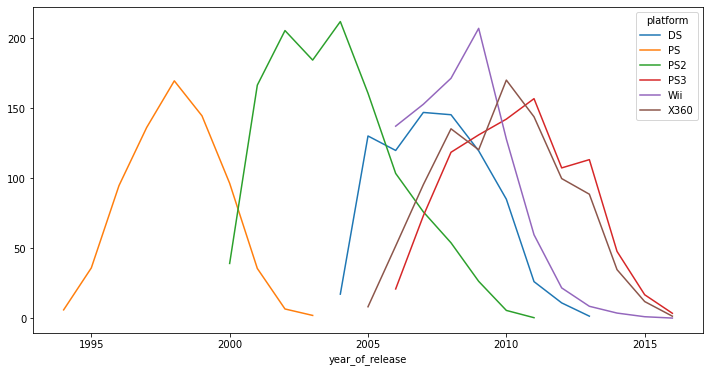

In [41]:
# сгруппируем платформы-лидеры и общие продажи топчика
top_6 = data.groupby('platform').sum()['total_sales'].sort_values(ascending=False).index.values[:5]
# выберем эту 6-ку через isin
top_6 = data[data.platform.isin(top_6_platform)]
# построим графики
top_6 = top_6.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_6.plot(figsize=(12,6))
plt.show() 


In [42]:
# сгрупируем платформы-топ по годам релиза и соберем в отдельный датасет
top = data.query('platform in @top_6_platform').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
top

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


__По графику видно,что платформа PS самая старая из всех в топе и не пересекается с остальными по временному показателю, поэтому принимаю решение отбросить эту платформу из нашего топа. В дальнейшем будем рассматривать период с 2000 по 2016гг, т.к. именно с 2000 начинается развитие всех остальных сильных платформ.__

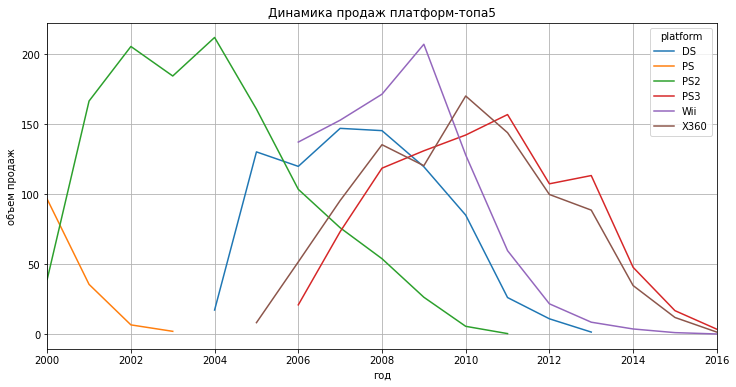

In [43]:
# построим график на основании сета top(платформа и год релиза) и рассмотрим период с 2000 по 2016
top.plot(grid=True, figsize=(12, 6), title = 'Динамика продаж платформ-топа5').set(
                                     xlabel = 'год', ylabel = 'объем продаж');
plt.xlim(2000, 2016)
plt.show() 

__Видим, что в наш топчик-6, вошли такие игры, как PS2, PS, Wii,DS,X360 и PS3. Каждая игра хороша в свое время,и пик каждой приходится на свой период. Но по графику видно, что популярность начала падать и приблизилась почти к 0 к 2016г. Видно так же по графику,что почти у каждой игры срок жизни составляет около 10 лет. И очевидно,что продажи стали падать после 2008г. Поиск Яндекс нам напомнил о мировом кризисе-2008. Теперь понятно,что повлияло на падение популярности. Одну игру-старожилу мы убрали и рассматривали топ-5.__

`Проанализируем по отдельности каждую игру из нашего топа`

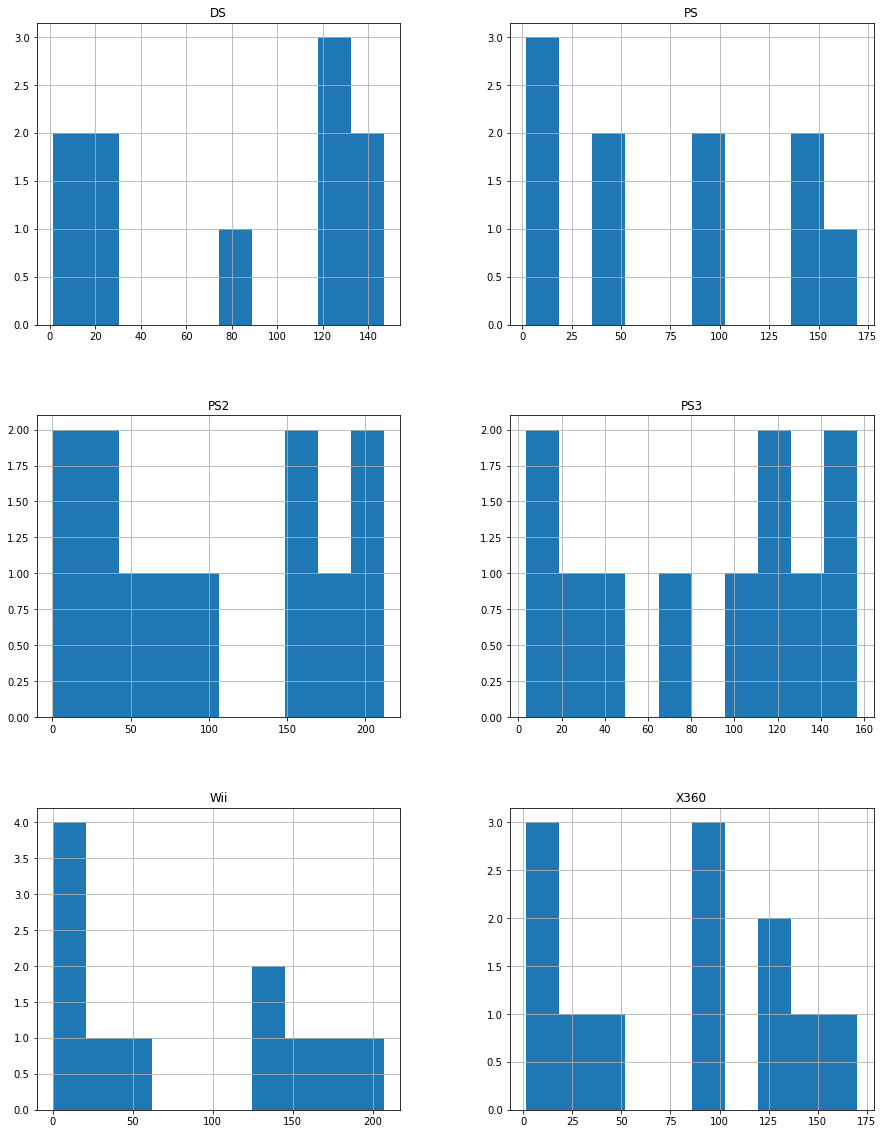

In [44]:
top.hist(figsize=(15, 20))
plt.show() 

In [45]:
# напомню себе последний сет
top

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


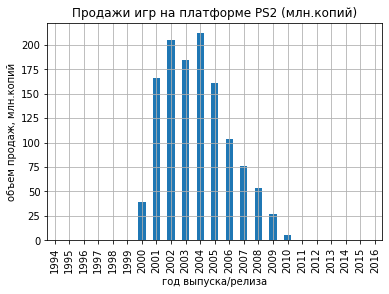

In [46]:
# начнем с нашего лидера PS2, построим диаграмму
top_6['PS2'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Продажи игр на платформе PS2 (млн.копий)'
                    ).set(xlabel='год выпуска/релиза', ylabel='объем продаж, млн.копий')
plt.show() 

__Диаграмма показывает нам,что релиз прошел в 2000,продалось около 39 млн.копий игр. Но большие продажи начались в 2001. Пик продаж состоялся в 2004г(211 млн.копий), и затем заинтересованность потребителей начала падать.Уже в 2010 платформа составила 5.64 млн.копий по миру и далее менее млн. Продолжительность жизни платформы составляет ≈ 10лет__

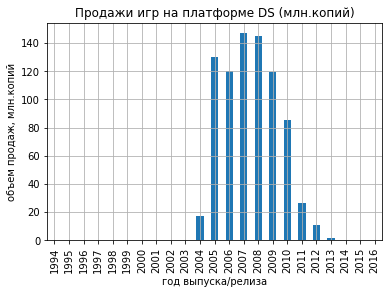

In [47]:
# рассмотрим DS, построим диаграмму
top_6['DS'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Продажи игр на платформе DS (млн.копий)'
                    ).set(xlabel='год выпуска/релиза', ylabel='объем продаж, млн.копий')
plt.show() 

__Релиз данной платформы прошел в 2004,стартовала игра с 17млн.копий. Пик продаж пришелся на 2007-2008гг, объем составил 145-146млн. проданных копий. С 2009г продажи пошли на спад, и уже в 2013г показатель продаж показал отметку в 1.5млн. игр. Продолжительность жизни платформы составляет ≈ 10лет__

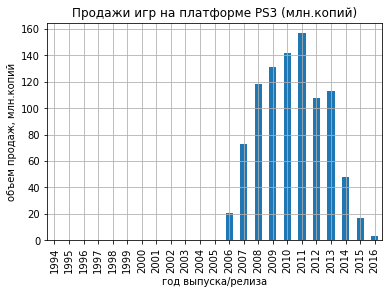

In [48]:
# рассмотрим PS3, построим диаграмму
top_6['PS3'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Продажи игр на платформе PS3 (млн.копий)'
                    ).set(xlabel='год выпуска/релиза', ylabel='объем продаж, млн.копий')
plt.show()

__Данная игра по сравнению с предыдущими двумя считается моложе. Релиз прошел в 2006г с продажей в 20млн.копий игр. Пик продаж пришелся на 2011г, в это время продалось около 156млн. игр. Далее резкий спад и уже в 2016г. показатель продаж равнялся 3.5млн. Думаю, здесь еще не все потеряно, надо делать прогноз. Продолжительность жизни платформы составляет ≈ 10лет__

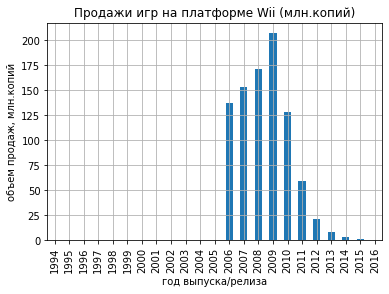

In [49]:
# рассмотрим PS3, построим диаграмму
top_6['Wii'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Продажи игр на платформе Wii (млн.копий)'
                    ).set(xlabel='год выпуска/релиза', ylabel='объем продаж, млн.копий')
plt.show()

__Платформа Wii стартовала в 2006г, одновременно с PS3. Но продажи у Wii составили 137млн.копий игр. Самые высоки продажи игр состоялись в 2009(206млн.) и уже в 2010 начался спад продаж, который в 2015г привел к отметке продаж в 1.5млн копий, а в 2016г всего 100тыс. Продолжительность жизни платформы составляет ≈ 9лет__

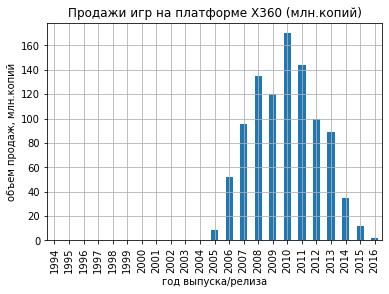

In [50]:
# рассмотрим PS3, построим диаграмму
top_6['X360'].plot.bar(x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Продажи игр на платформе X360 (млн.копий)'
                    ).set(xlabel='год выпуска/релиза', ylabel='объем продаж, млн.копий')
plt.show()

__Данная платформа стартовала в 2005г с продажами в 8млн.проданных копий игр. Пик продаж произошел в 2010г, составил 170млн.копий. С 2011г продажи стали падать, и к 2016г показатель продаж продаж составил 1.5 млн.копий. Продолжительность жизни платформы составляет ≈ 11лет__

__Итак, на круговой диаграмме, как и на столбчатых диаграммах, видно:__
- Самый большой процент продаж имеет игра PS2(14.7%), на втором месте по продажам идет Х360 и РS3(11.5%, 11.1%). 
- Cамыми малопродаваемыми оказались игры GG,3DO,PCFX(приблизительно по 2%). 
- С почти одинаковым объемом продаж(≈3-4%) идут игры PS4,GBA,PSP,3DS,PC,XB.
- 3 игры вышли приблизительно в один год 2006(PS3, Wii, X360), но показатели продаж отличаются друг от друга. Самой интересной из них показалась пользователям платформа X360. Процент продаж составил 11.5% мирового рынка комп.игр.

__В наш топ-6 вошли игры с большими продажами в начале 90-х, но уже через лет 10 своей активной деятельности они перестали приносить прибыль из-за потери популярности.Из всех диаграмм виден всплеск продаж в течение года сразу же после релиза. Через 3-4 года наблюдается пик и спад,который растягивается еще на 4-5 лет. Сказываются все-таки более прогрессивные технологии, и на пик славы выходят уже другие игры с более качественной графикой. Для дальнейшего развития платформы компании должны вложиться в дальнейшее развитие своих игр, развивать внутренние технологии по улучшению интерфейса и др. внутренних программ. Если вложений будет больше, то соответственно, и продажи увеличатся, и срок жизни игр растягивается. У всех платформ продолжительность жизни примерно 10 лет.__

In [51]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


In [52]:
# посмотрим список характерных значений датасета top
top.describe()

platform,DS,PS,PS2,PS3,Wii,X360
count,10.000000,10.000000,12.000000,11.000000,11.000000,12.000000
mean,80.276000,72.758000,102.796667,84.667273,81.016364,80.103333
std,59.796231,63.351713,79.405729,54.637565,79.136330,57.484408
min,1.540000,2.070000,0.450000,3.600000,0.180000,1.520000
25%,19.497500,13.900000,35.977500,34.360000,6.170000,29.045000
50%,102.280000,65.330000,89.705000,107.360000,59.650000,91.995000
75%,127.557500,126.220000,170.900000,124.725000,144.960000,124.032500
max,146.940000,169.490000,211.810000,156.780000,206.970000,170.030000


__Знаем,что приблизительный срок жизни каждой платформы составляет около 10 лет. Но в эту десятку лет входят и стар и млад, поэтому для прогноза я хочу выбрать актуальный период в 7 лет. Значит, установим актуальный период 2012-2016г. Создадим отдельную переменную для этого значения actual_period.__

In [53]:
# отсортируем годы релиза, поставим условие больше 2012г. и выведем результат 
actual_period = data.query('year_of_release >= 2012')
actual_period.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


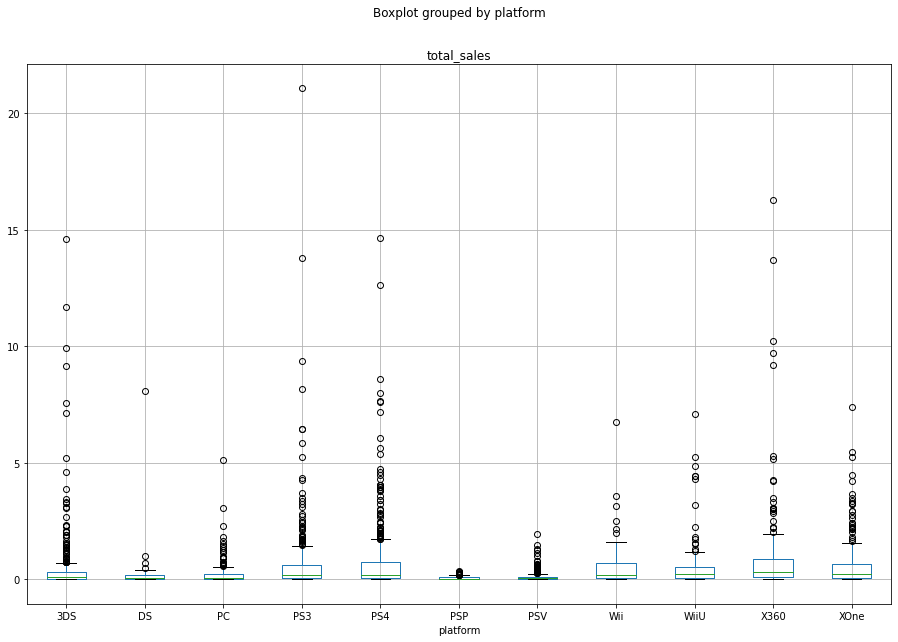

In [54]:
# выведем диаграмму размаха потпродажам на платформах
actual_period.boxplot(by='platform', column='total_sales', figsize=(15,10))
plt.show()

`Диаграмма размаха показает нам выбросы. Надо бы поближе посмотреть ящик.`

In [55]:
# создадим список с платформами,которые входят в период 2006-2016, чтобы спрогнозировать дальнейшую прибыльность платформ
platform_in_actual_period = ['3DS','DS','PC','PS2','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XOne']

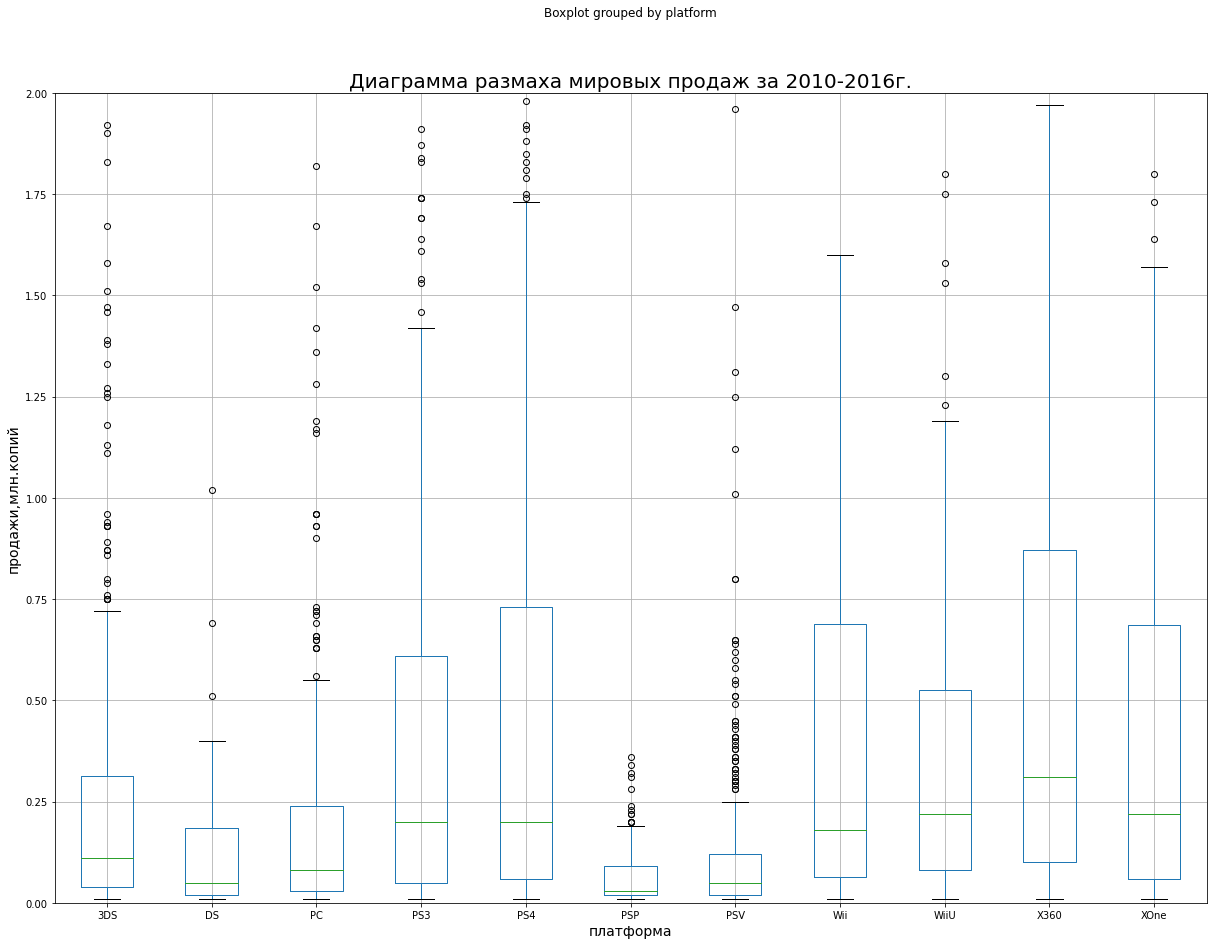

In [56]:
# создадим диаграмму размаха на основе списка платформ и продаж
actual_period.query('platform in @platform_in_actual_period').boxplot(
                column='total_sales', by='platform', figsize=(20, 15)).set(ylim=(0,2))
plt.title('Диаграмма размаха мировых продаж за 2010-2016г.', size=20)
plt.xlabel('платформа', size=14)
plt.ylabel('продажи,млн.копий', size=14)
plt.show()

__Диаграмма показывает распределение продаж между платформами в 2012-2016 годы. Видно, что самое большое медианное значение и длинный хвост у игровых платформ - PS4, PS3, Х360 и XOne. Видим,что максимальные продажи тянулись к отметке в 200млн.копий. Для того,что бы определить самую перспективную платформу, нужно глянуть на общую динамику продаж в разрезе лет. Думаю,что стоит смотреть на более молодые платформы,которые, еще "на плаву" и должны дальше развиваться.__

In [57]:
# посмотрим на сводной,какие платформы, на каком этапе развития по продажам за актуальный период 2012-2016
actual_sales_platform = actual_period.query('platform in @platform_in_actual_period').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
actual_sales_platform

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


__На таблице явно отражена тройка лидеров,которые к 1016 году имеют хорошие(хоть и не максимальные) продажи. Эта тройка лидеров наас заинтересует больше всех.__

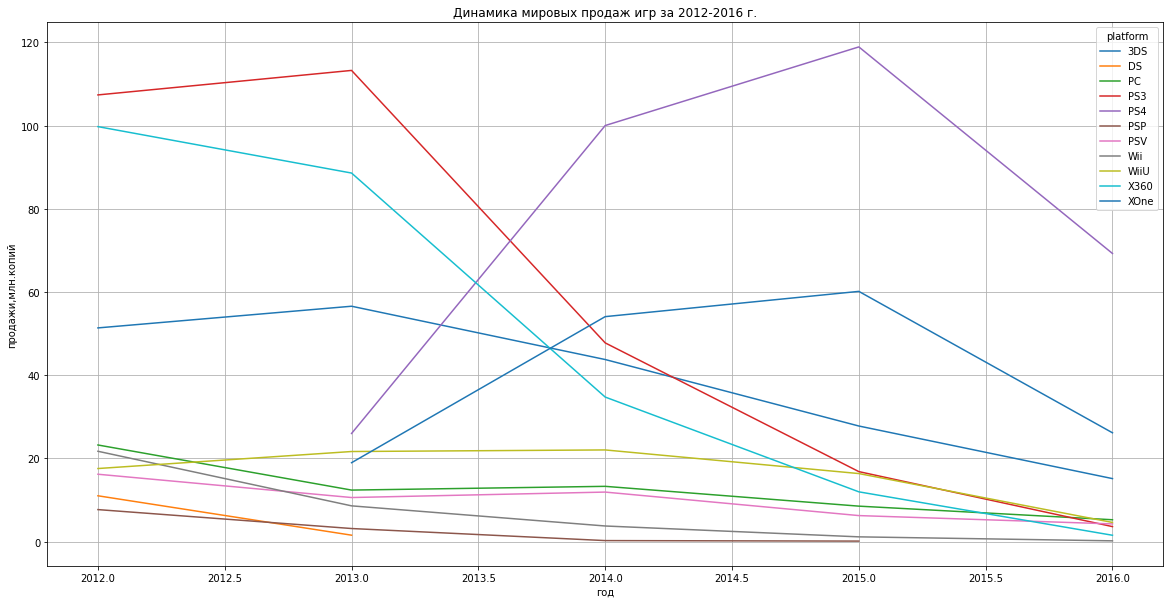

In [58]:
# выведем динамику мировых продаж
actual_sales_platform.plot(grid=True, figsize=(20, 10), title = 'Динамика мировых продаж игр за 2012-2016 г.').set(
                                     xlabel = 'год', ylabel = 'продажи,млн.копий');

In [59]:
# проверим значения
actual_sales_platform.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,5.000000,2.000000,5.000000,5.000000,4.000000,4.000000,5.000,5.000000,5.000000,5.000000,4.000000
mean,38.922000,6.275000,12.530000,57.758000,78.535000,2.797500,9.836,7.074000,16.438000,47.308000,39.830000
std,17.170394,6.696301,6.781217,50.617905,40.567917,3.547942,4.724,8.807657,7.068244,44.599522,20.313977
min,15.140000,1.540000,5.250000,3.600000,25.990000,0.120000,4.250,0.180000,4.600000,1.520000,18.960000
25%,27.780000,3.907500,8.520000,16.820000,58.435000,0.210000,6.250,1.140000,16.350000,11.960000,24.352500
50%,43.760000,6.275000,12.380000,47.760000,84.625000,1.690000,10.590,3.750000,17.560000,34.740000,40.110000
75%,51.360000,8.642500,13.280000,107.360000,104.725000,4.277500,11.900,8.590000,21.650000,88.580000,55.587500
max,56.570000,11.010000,23.220000,113.250000,118.900000,7.690000,16.190,21.710000,22.030000,99.740000,60.140000


__Итак, к концу 2016 г остались такие платформы,как PS4,XOne,3DS,PC,PSV. По графику видно, как линии тянутся дальше 2016г, а значит, дальнейшему развитию быть.
Продажи таких компаний, как PSP,DS и PS2(которая была лидером продаж) стремяться к нулю. Возможно, они развиваются, но показатели показывают минимальные продажи игр.__

`Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Рассчитаем коэффициенты корреляции между объемом продаж и отзывами пользователей и критиков на актуальных в 2016 году платформах за актуальный период 2012-2016г:`

`Построем диаграммы рассеяния для нескольких платформ. Выберем наших лидеров:PS4,XOne,3DS,PC,PSV.`

__Рассмотрим платформу PS4__

In [60]:
# выводим корреляцию между пользовательскими оценками и общими продажами
game_ps4_user = data[data['platform']=='PS4']
game_ps4_user['user_score'].corr(game_ps4_user['total_sales'])

-0.031957110204556376

Диаграмма рассеяния для PS4


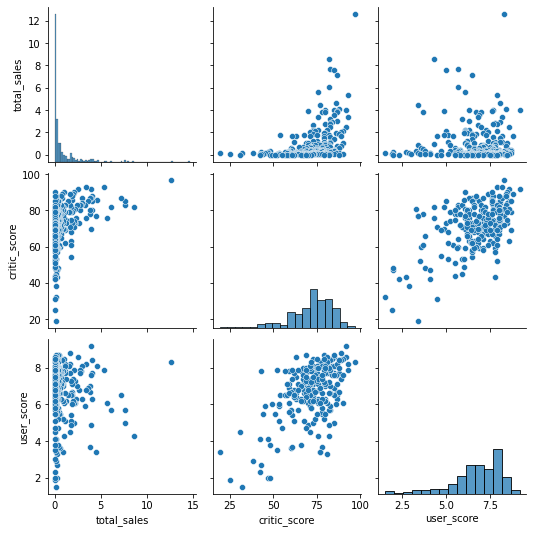

In [61]:
# для интереса выведу общую диаграмму рассеяния для PS4
print("Диаграмма рассеяния для PS4")
sns.pairplot(data[data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

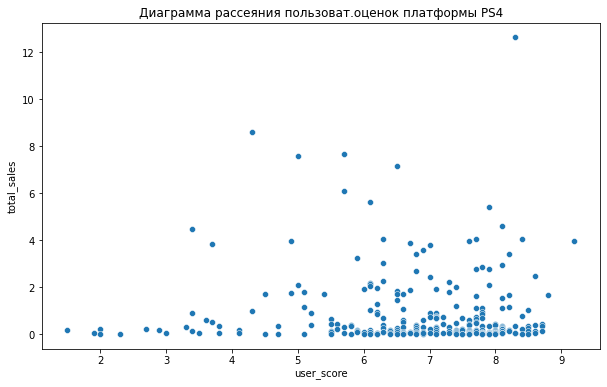

In [62]:
# надо построить диаграмму рассеяния оценок пользователей платформы PS4
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_ps4_user, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния пользоват.оценок платформы PS4')
plt.show()

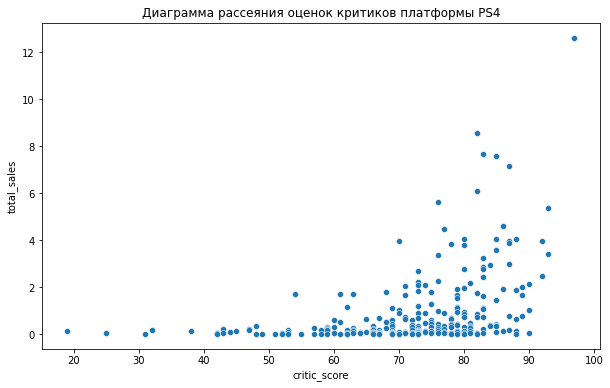

In [63]:
# надо построить диаграмму рассеяния оценок критиков платформы PS4
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_ps4_user, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния оценок критиков платформы PS4')
plt.show()

In [64]:
print("Матрица корреляций")
data[data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [65]:
#__По диаграммам видно,что скопление

__Рассмотрим платформу XOne__

In [66]:
# выводим корреляцию между пользовательскими оценками и общими продажами
game_xone_user = data[data['platform']=='XOne']
game_xone_user['user_score'].corr(game_ps4_user['total_sales'])

nan

Диаграмма рассеяния для XOne


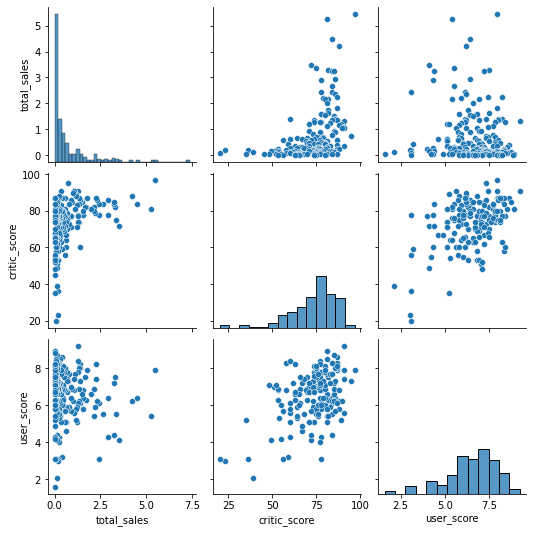

In [67]:
# для интереса выведу общую диаграмму рассеяния для XOne
print("Диаграмма рассеяния для XOne")
sns.pairplot(data[data.platform == "XOne"][['total_sales', 'critic_score', 'user_score']])
plt.show()

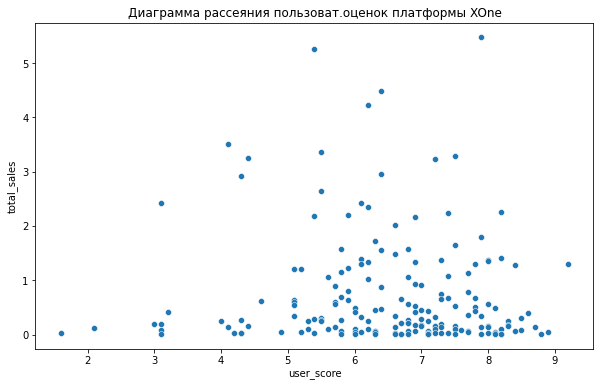

In [68]:
# надо построить диаграмму рассеяния оценок пользователей платформы PS4
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния пользоват.оценок платформы XOne')
plt.show()

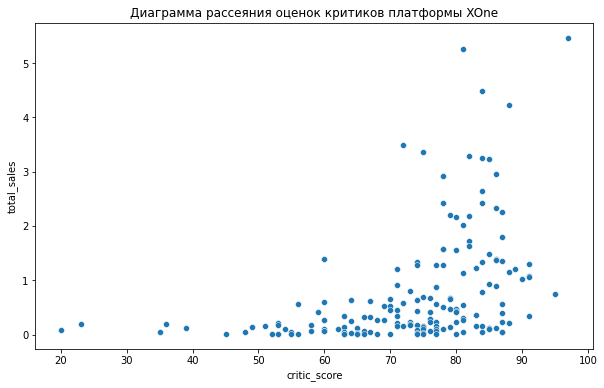

In [69]:
# надо построить диаграмму рассеяния оценок критиков платформы XOne
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния оценок критиков платформы XOne')
plt.show()

In [70]:
print("Матрица корреляций")
data[data.platform == "XOne"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


__Рассмотрим платформу 3DS__

In [71]:
# выводим корреляцию между пользовательскими оценками и общими продажами
game_xone_user = data[data['platform']=='3DS']
game_xone_user['user_score'].corr(game_ps4_user['total_sales'])

nan

Диаграмма рассеяния для 3DS


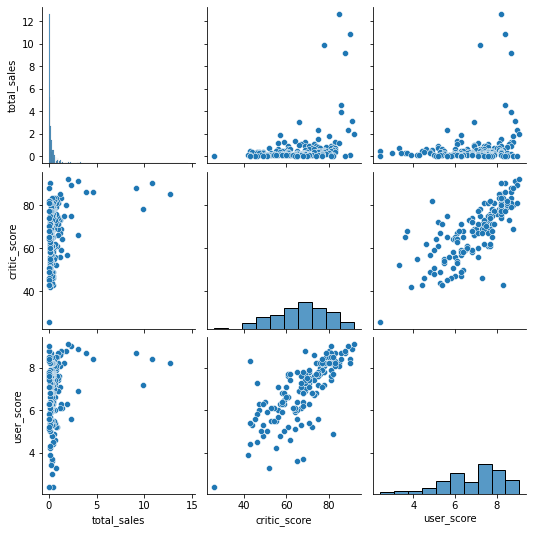

In [72]:
# для интереса выведу общую диаграмму рассеяния для XOne
print("Диаграмма рассеяния для 3DS")
sns.pairplot(data[data.platform == "3DS"][['total_sales', 'critic_score', 'user_score']])
plt.show()

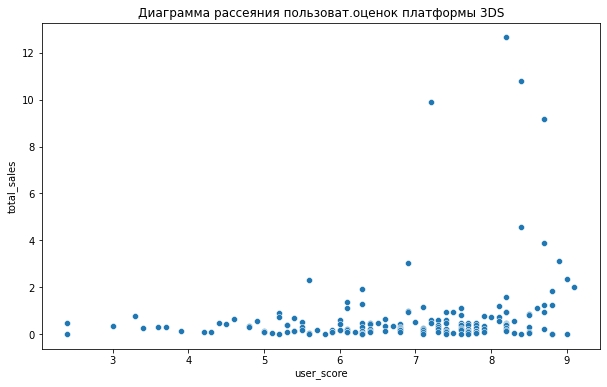

In [73]:
# надо построить диаграмму рассеяния оценок пользователей платформы PS4
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния пользоват.оценок платформы 3DS')
plt.show()

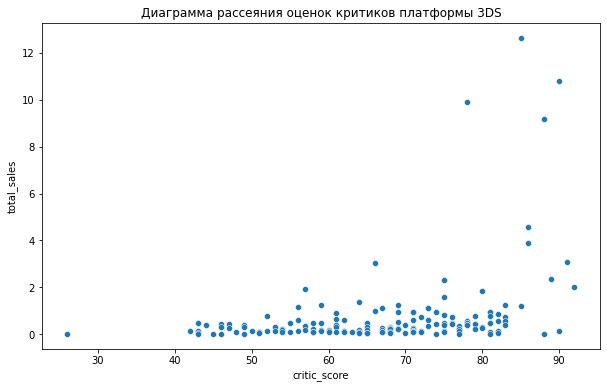

In [74]:
# надо построить диаграмму рассеяния оценок критиков платформы XOne
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния оценок критиков платформы 3DS')
plt.show()

In [75]:
print("Матрица корреляций")
data[data.platform == "3DS"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


__Рассмотрим платформу PC__

In [76]:
# выводим корреляцию между пользовательскими оценками и общими продажами
game_xone_user = data[data['platform']=='PC']
game_xone_user['user_score'].corr(game_ps4_user['total_sales'])

nan

Диаграмма рассеяния для PC


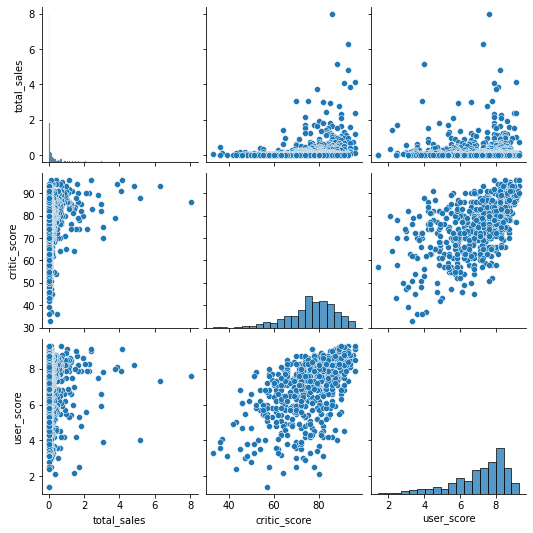

In [77]:
# для интереса выведу общую диаграмму рассеяния для XOne
print("Диаграмма рассеяния для PC")
sns.pairplot(data[data.platform == "PC"][['total_sales', 'critic_score', 'user_score']])
plt.show()

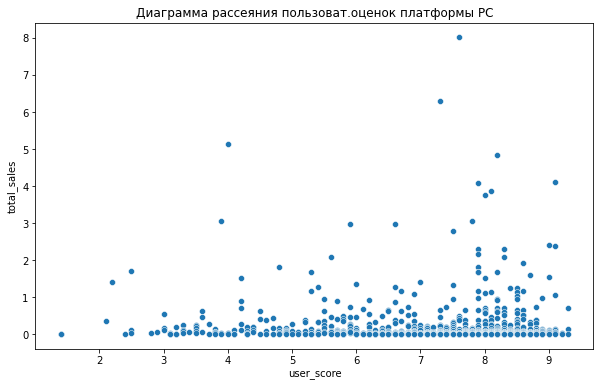

In [78]:
# надо построить диаграмму рассеяния оценок пользователей платформы PC
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния пользоват.оценок платформы PC')
plt.show()

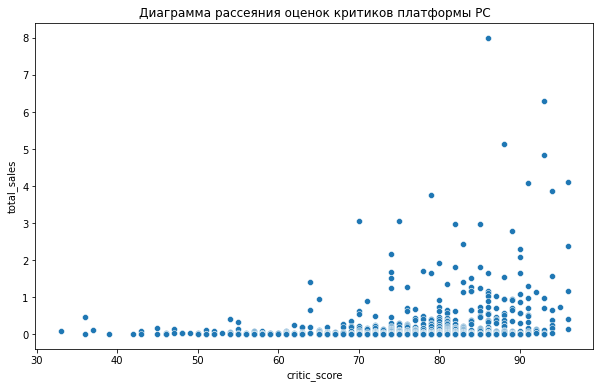

In [79]:
# надо построить диаграмму рассеяния оценок критиков платформы PC
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния оценок критиков платформы PC')
plt.show()

In [80]:
print("Матрица корреляций")
data[data.platform == "PC"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.256779,0.011107
critic_score,0.256779,1.000000,0.554175
user_score,0.011107,0.554175,1.000000


__Рассмотрим платформу PSV__

In [81]:
# выводим корреляцию между пользовательскими оценками и общими продажами
game_xone_user = data[data['platform']=='PSV']
game_xone_user['user_score'].corr(game_ps4_user['total_sales'])

nan

Диаграмма рассеяния для PSV


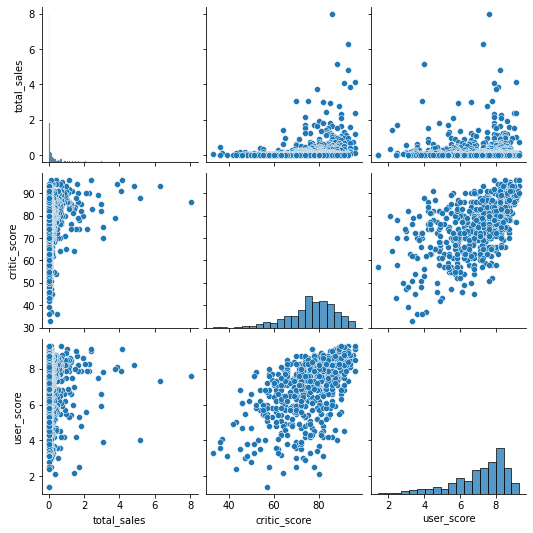

In [82]:
# для интереса выведу общую диаграмму рассеяния для XOne
print("Диаграмма рассеяния для PSV")
sns.pairplot(data[data.platform == "PC"][['total_sales', 'critic_score', 'user_score']])
plt.show()

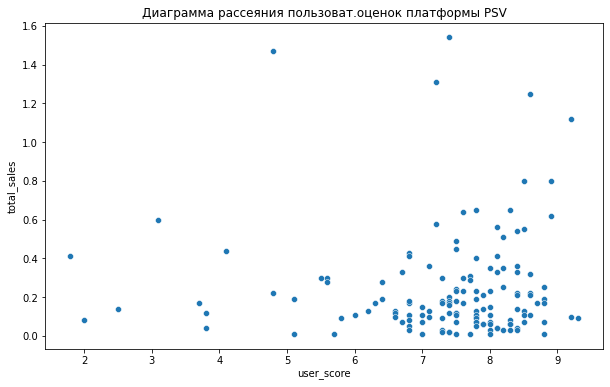

In [83]:
# надо построить диаграмму рассеяния оценок пользователей платформы PSV
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния пользоват.оценок платформы PSV')
plt.show()

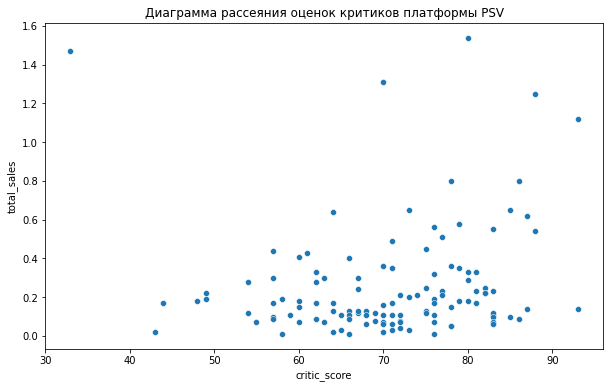

In [84]:
# надо построить диаграмму рассеяния оценок критиков платформы PSV
plt.figure(figsize=(10,6))
sns.scatterplot(data=game_xone_user, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния оценок критиков платформы PSV')
plt.show()

In [85]:
print("Матрица корреляций")
data[data.platform == "PSV"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.131763,0.013489
critic_score,0.131763,1.000000,0.734300
user_score,0.013489,0.734300,1.000000


__Судя по коэффициенту корреляции между продажами и пользовательскими оценками связь отсутствует, можно говорить о ее существовании только в отношении WiiU. А вот оценка критиков сильнее воздействует на объемы продаж, хотя о сильной зависимости говорить нет оснований, тем не менее это всегда 30-40% за исключением PSV.
На диаграмме рассеяния оценок потребителей видно, что плотность продаж выше в областях графика с высокой оценкой и практически везде в этой части есть выбросы с продажами максимально большого количества копий.
Мы видим, что есть тенденция высоких продаж при высокой оценке игры критиками, она выражена гораздо ярче: мы видим четкие всплески продаж у игр с высокой оценкой.
Эти выбросы-это показатель того, что "выстреливают" какие-то особо понравившиеся потребителям игры. Надо бы компании состредоточиться на данных играх и совершенствовать их.__


__Взглянем на популярные жанры игр.__

In [86]:
actual_genre_platform = actual_period.query('platform in @platform_in_actual_period').pivot_table(
                       index='genre', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum').sum(axis = 1).sort_values(ascending=False)
actual_genre_platform

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
dtype: float64

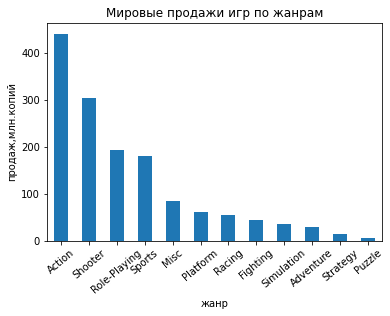

In [87]:
# построем диаграмму для визуального анализа
actual_genre_platform.plot.bar(rot=40).set(
                       title = 'Мировые продажи игр по жанрам',
                       xlabel = 'жанр', ylabel = 'продаж,млн.копий')
plt.show()

In [88]:
# и на круговой диаграмме можно посмотреть продажи по процентам
#actual_genre_platform.plot(kind = 'pie', y ='total_sales', autopct='%1.1f%%', figsize= (15,15),
#                         title = 'Продажи игр по жанрам за 2010-2016гг', labels = actual_genre_platform['genre'])

__Иии, экшены с 673 млн.проданных копий, это 26.5% игрового рынка на период 2010-2016, вырываются вперед и побеждают!
На втором месте стрелялки, у них 18.9% и 479 млн.продаж. А 3 место почти делят спортивные и ролевые игры. У них 12.9% и 12.4%. Жаль,что у пазлов с их крохотными 0.8% мало поклонников. Может, предпочитают бумажные))__

`Продажи могут быть разными и в разное время, поэтому нужно проанализировать данную величину в разрезе лет на наш активный период. Посмотрим на продажи,медиану,среднее значение.`

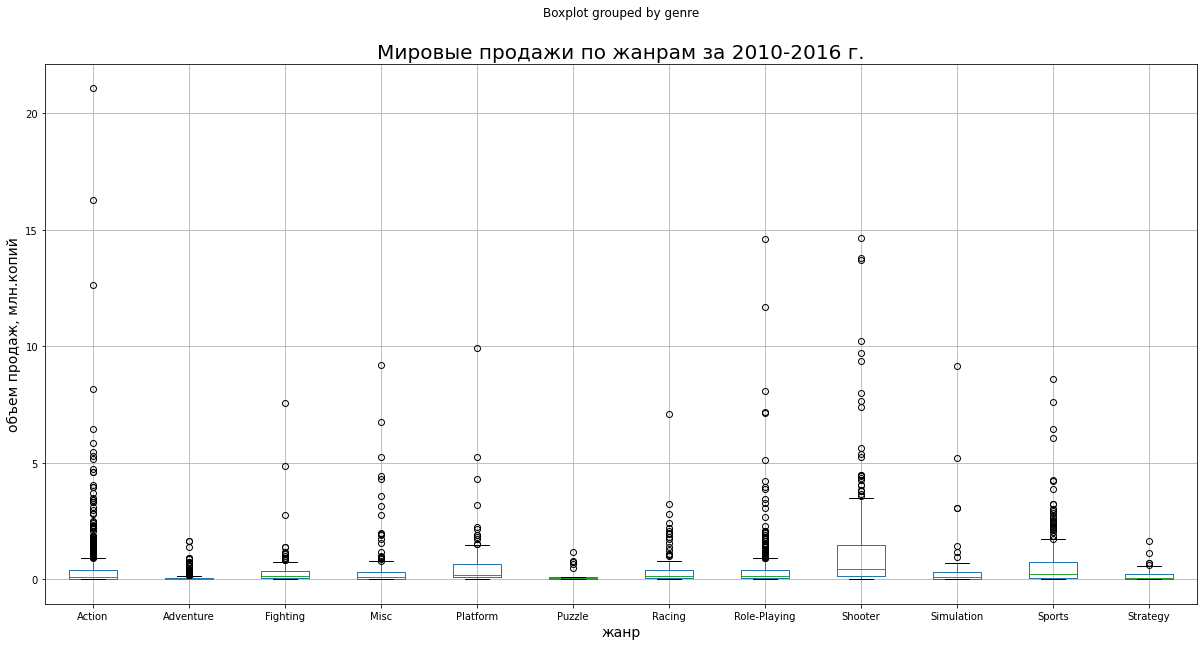

In [89]:
#продажи по жанрам в целом

actual_period.query('platform in @platform_in_actual_period').boxplot(
                column='total_sales', by='genre', figsize=(20, 10))
plt.title('Мировые продажи по жанрам за 2010-2016 г.', size=20)
plt.xlabel('жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

In [90]:
# выведем среднее продаж по жанрам
actual_period.query('platform in @platform_in_actual_period').pivot_table(
                       index='year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'mean')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,0.450000,0.101579,0.316552,0.600541,1.670000,0.156364,0.453667,0.601410,1.494792,0.742222,0.563333,0.217333
2013,0.833401,0.101500,0.354500,0.601667,0.681667,0.320000,0.773125,0.626056,1.051525,0.479444,0.776792,0.322105
2014,0.517181,0.074267,0.689130,0.556667,0.881000,0.212857,0.617037,0.512584,1.387447,0.507273,0.836111,0.122500
2015,0.284664,0.151111,0.376190,0.296667,0.465385,0.118333,0.448333,0.482564,1.985588,0.377333,0.692203,0.115625
2016,0.169157,0.068214,0.279375,0.081250,0.215333,0.010000,0.116250,0.336667,0.813191,0.105000,0.489375,0.086923


__Видно, что показатель продаж в течение 7 лет скачет и меняется. Вероятно, надо сфокусироваться на меньший исследуемый срок. Можно взять период в 2-3 года?!__

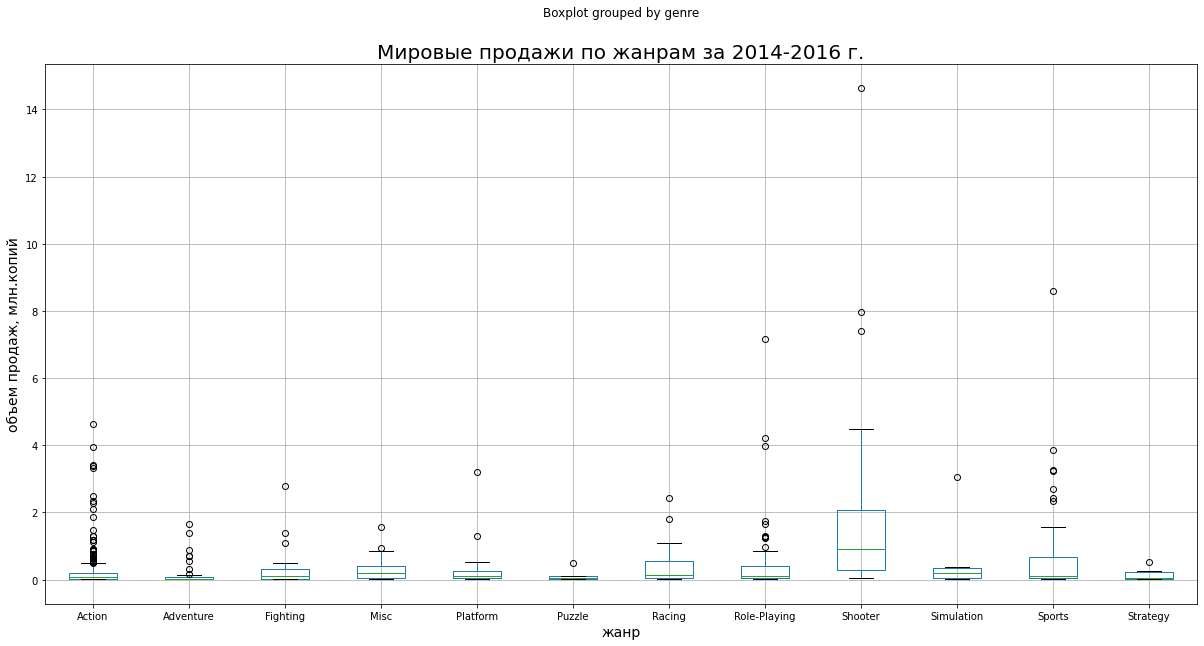

In [91]:
# выборка за последние три года

actual_period.query('platform in @platform_in_actual_period and 2014 < year_of_release < 2016' ).boxplot(
                column='total_sales', by='genre', figsize=(20, 10))
plt.title('Мировые продажи по жанрам за 2014-2016 г.', size=20)
plt.xlabel('жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

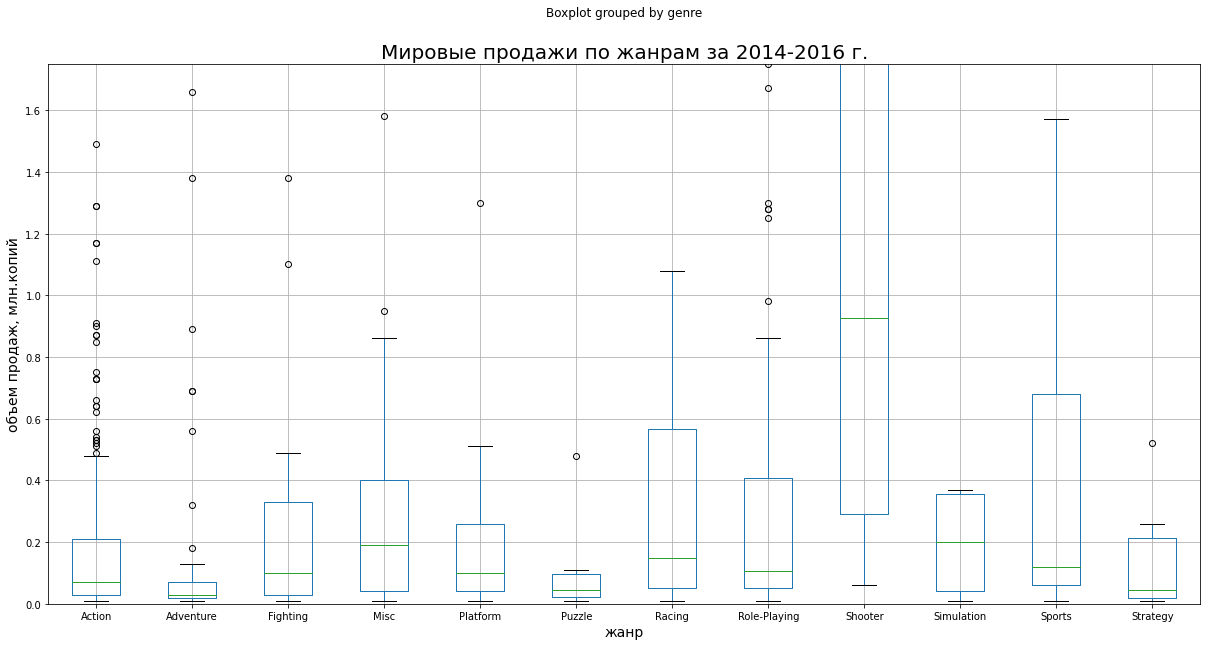

In [92]:
# то же, область медианы

actual_period.query('platform in @platform_in_actual_period and 2014 < year_of_release < 2016' ).boxplot(
                column='total_sales', by='genre', figsize=(20, 10)).set(ylim = (0, 1.75))
plt.title('Мировые продажи по жанрам за 2014-2016 г.', size=20)
plt.xlabel('жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

__Итак, если смотреть абсолютное выражение показателей продаж за последние 7 лет, то лидируют жанры Action, Shooter, Sports, Role-Playing и Misc. Очень малой популярностью пользуются игры жанра Adventure, Strategy и Puzzle.
Если выбрать период меньше, 3 года, то лидерами остаются те же самые платформы.
Если посмотреть на медианные значения, то можно заметить, что абсолютными лидерами по всем значениям, попавшим в межквартильный интервал, медиане и среднему объема продаж - у жанров Shooter, Sport, Role-Playing. Жанр Action менее стабилен в продажах и имеет наибольшее количество выбросов, т.е. держится за счет небольшого количества очень удачных игр.__

__Из этого делаем вывод,что наиболее перспективными для составления прогноза являются игровые жанры Shooter, Sports и Role-Playing, которые показывают более стабильные, высокие и предсказуемые значения продаж.__

__Вывод по разделу 3__

__Полный цикл жизни платформы (на примере топ-5) составляет в среднем 10 лет. Мы видим закономерность: резкий всплеск продаж через год, 5-летний (в среднем) пик, и спад, растянутый на 4-5 лет.__

__Топ-5 платформ за исследуемое время : PS2, X360, PS3, Wii, DS.__

__Для прогноза наиболее перспективной платформы на 2017 год был выбран актуальный период в 7 лет с 2010 по 2016гг.__

__Рынок компьютерных игр, который начал расти в начале 90-х и достиг своего пика в 2008-2009 годах, к концу 2016 года оказался на спаде. Возможно, из-за перенасыщения разнообразия жанров игр, возможно, из-за отсутствия необходимых техн. инноваций, которые дали бы толчок развитию нового скачка. Выделяющихся перспективных новых платформ, которые показывали бы тенденцию к росту, нет. Поэтому мы остановились на тех платформах, которые относительно молоды и показывают наибольшие продажи__

__Объемы продаж зависят от оценок пользователей и от оценок критиков. Но это не прямая зависимость. Да, она прослеживается в области графиков.__

__В абсолютном выражении по продажам за 7 лет лидируют жанры Action, Shooter, Sports, Role-Playing и Misc, и совсем не пользуются популярностью Adventure, Strategy и Puzzle.__

__Наиболее перспективными для составления прогноза на 2017 год являются игровые жанры Shooter, Sports и Role-Playing, которые показывают более стабильные, высокие и предсказуемые значения продаж.__

### Составьте портрет пользователя каждого региона

__Нужно составить портрет пользователя каждого региона: определить топ-5 платформ региона и популярные там жанры. А затем провести сравнительный анализ__

In [93]:
# посмотрим на данные регионов
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


`Создадим словарь regions,значением которого будут названия регионов. Выведем для каждого региона топ-5 платформ`

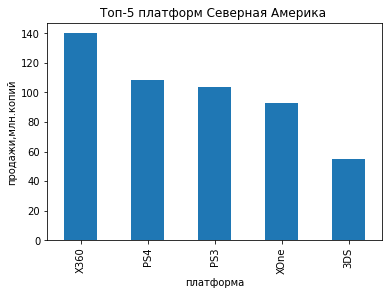

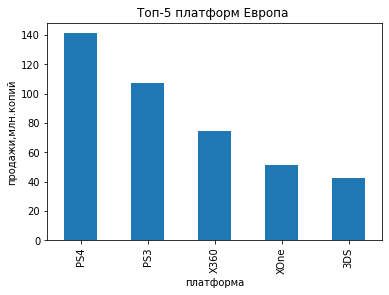

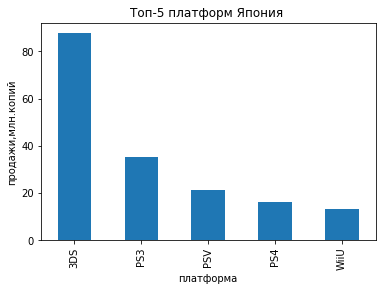

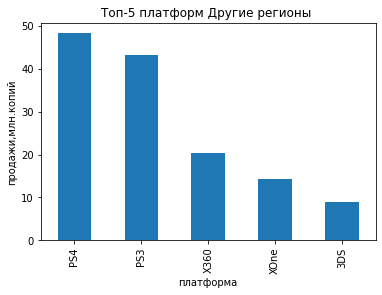

In [94]:
regions = {'na_sales': 'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Другие регионы'}
# выведем диаграммы с топовыми платформами
for name in regions:
    actual_period.query('platform in @platform_in_actual_period').pivot_table(index='platform', values = name, aggfunc = 'sum').sum(
                    axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                    title=f'Топ-5 платформ {regions[name]} ').set(xlabel='платформа', ylabel='продажи,млн.копий');
    plt.show()

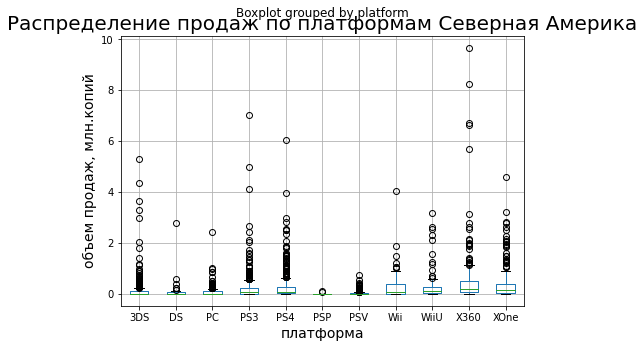

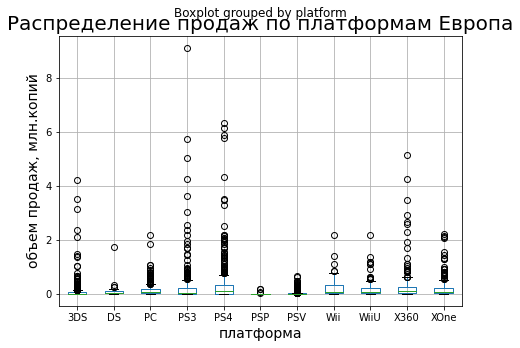

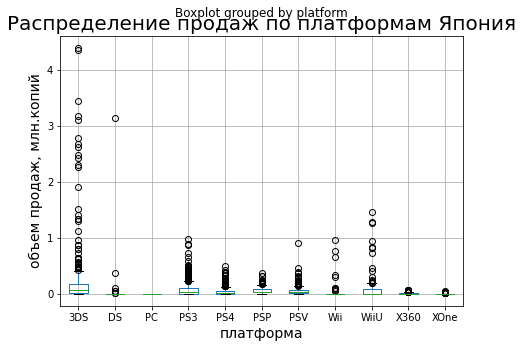

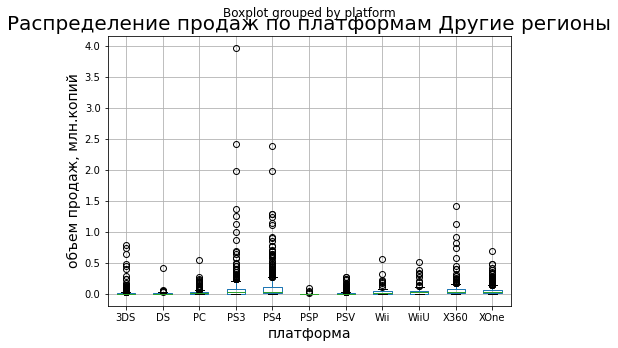

In [95]:
# переберем платформы регионов и построем диаграммы рассеяния распределения продаж по каждому региону
for name in regions:
    actual_period.query('platform  in @platform_in_actual_period').boxplot(column= name, by='platform', figsize=(7,5))
    
    plt.title(f'Распределение продаж по платформам {regions[name]}', size=20)
    plt.xlabel('платформа', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

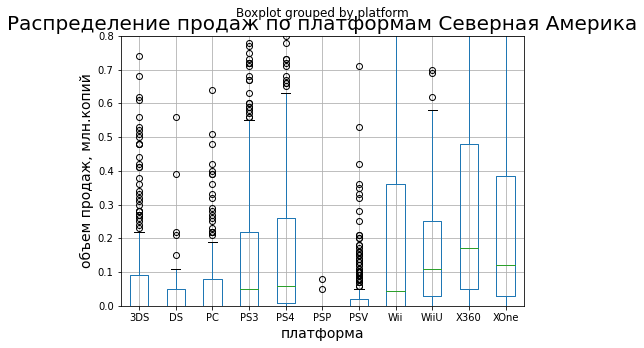

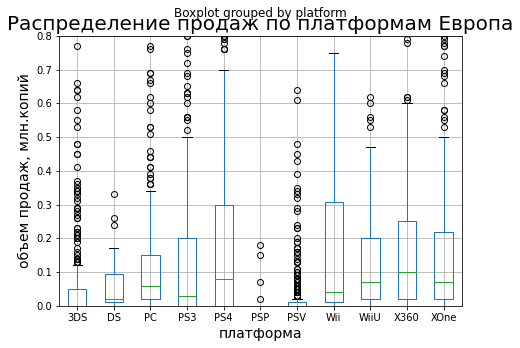

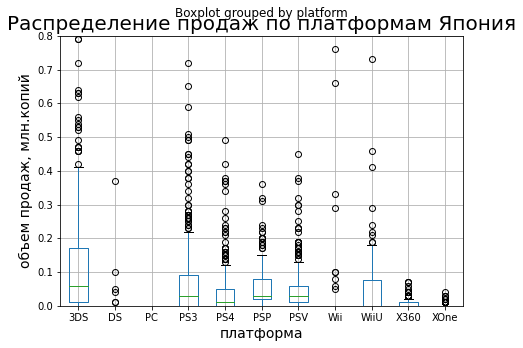

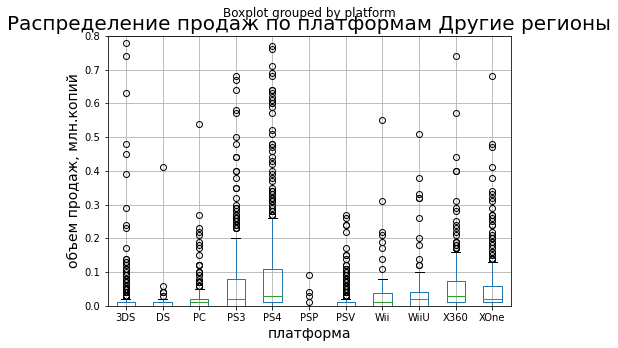

In [96]:
# построем диаграммы рассеяния c медианой,среднему значению
for name in regions:
    actual_period.query('platform  in @platform_in_actual_period').boxplot(column= name, by='platform', figsize=(7,5))
   
    plt.ylim(0, 0.8)
    plt.title(f'Распределение продаж по платформам {regions[name]}', size=20)
    plt.xlabel('платформа', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

__Если сравнивать абсолютные продажи за 2010-2016г с медианными значениями платформ, то увидим некоторые отклонения, но в целом видно,что Северная Америка отдает предпочтение игровым платформам X360 и XOne, а также японским PS3, PS4,Wii.
Вкусы с Северной Америкой в играх совпадают и у Европы и других регионов
А Япония предпочитает свои PS3, PSV, PS4, 3DS, Wii.__

Самые популярные жанры (топ-5).
Посмотрим, чем отличаются пристрастия игроков разных регионов: сгруппируем данные актуального периода по жанрам и регионам и построим диаграммы:

`Проверим пристрастия игроков в жанрах по каждому региону`

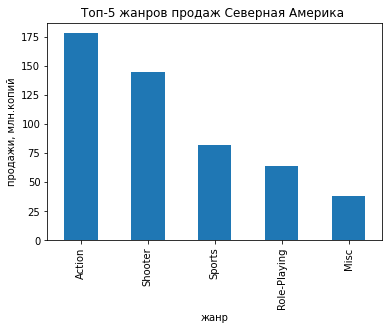

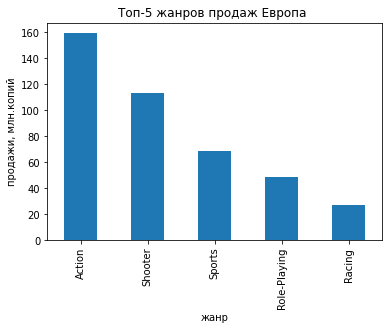

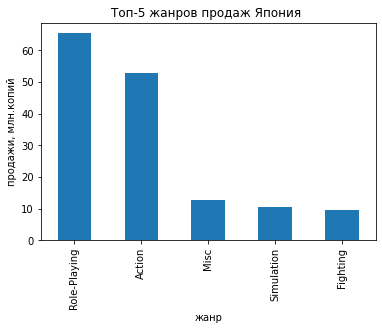

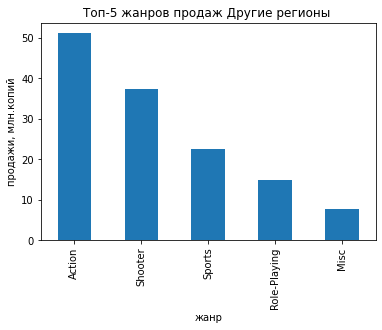

In [97]:
for name in regions:
    actual_period.query('platform in @platform_in_actual_period').pivot_table(index='genre', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                                     title=f'Топ-5 жанров продаж {regions[name]} ').set(
                                     xlabel='жанр', ylabel='продажи, млн.копий');
    plt.show()

__Практически во всех регионах популярны все жанры: Action, Shooter, Sports, Role-Playing и Misc. В Японии лидером продаж является Role-Playing, Action и Misc. Так же здесь любят Platform и Shooter.__

`Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе`

In [98]:
# для наглядности добавим в датасает actual_period колонку с расшифровкой рейтинга ESRB.
rating_dict = [{
'EC':'EC (3+)',
'E':'E (6+)',
'E10+':'E (10+)',   
'T':'T (13+)',
'M':'M (17+)',
'AO':'AO (только для взрослых)',
'K-A':'E (6+ до 1998 года)',
'RP':'Рейтинг ожидается',
'no rating':'Рейтинг не определен'
}]

In [99]:
rating = pd.DataFrame(rating_dict).transpose().reset_index()
rating.columns = ['rating','description']


actual_period = actual_period.merge(rating )
actual_period.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,description
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,M (17+)
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,M (17+)
2,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,M (17+)
3,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68,M (17+)
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,M (17+)


In [100]:
# проверим сколько категорий есть в сете
actual_period['description'].value_counts()

Рейтинг не определен    1275
M (17+)                  498
T (13+)                  412
E (6+)                   395
E (10+)                  306
Name: description, dtype: int64

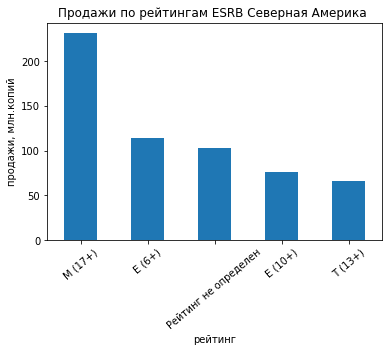

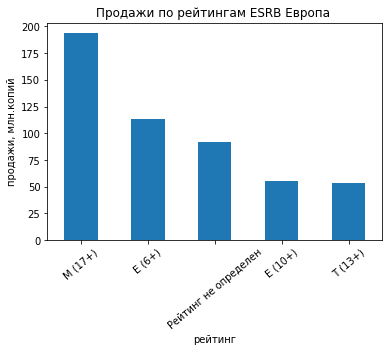

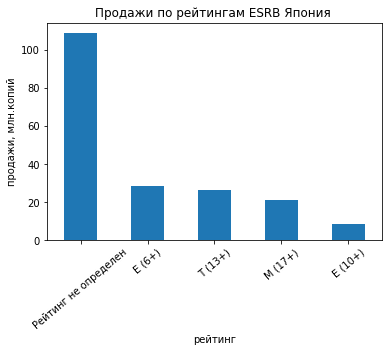

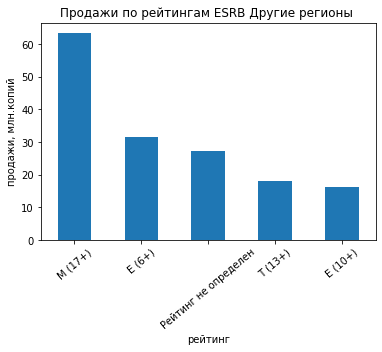

In [101]:
for name in regions:
    actual_period.query('platform in @platform_in_actual_period').pivot_table(index='description', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).plot(kind='bar', rot=40,
                                     title=f'Продажи по рейтингам ESRB {regions[name]} ').set(
                                     xlabel='рейтинг', ylabel='продажи, млн.копий');
    plt.show()

`Чтобы посмотреть распределения продаж внутри каждого рейтинга, построим боксплот`

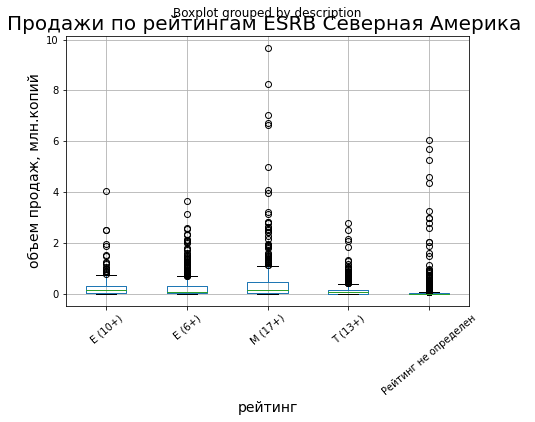

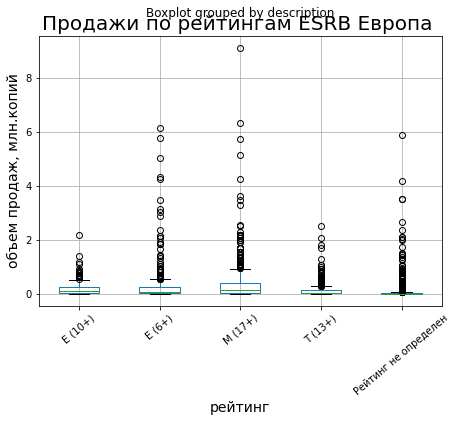

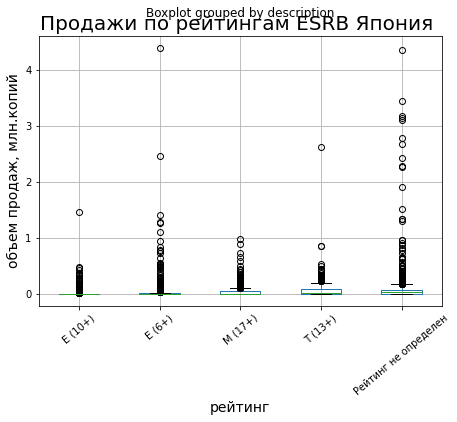

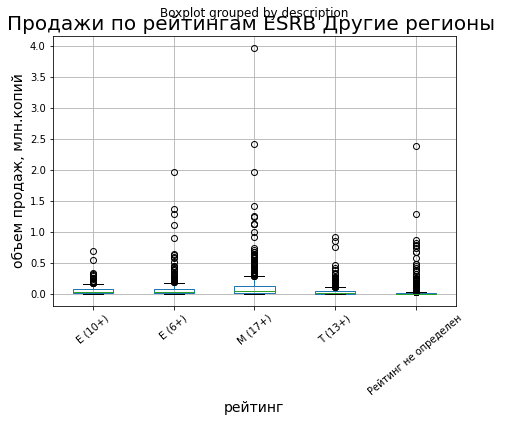

In [102]:
for name in regions:
    actual_period.query('platform in @platform_in_actual_period').boxplot(
                                     column= name, by='description', figsize=(7,5),rot=40)
    
    plt.title(f'Продажи по рейтингам ESRB {regions[name]} ', size=20)
    plt.xlabel('рейтинг', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

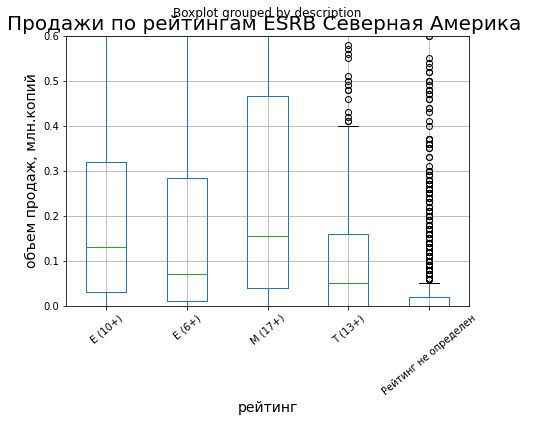

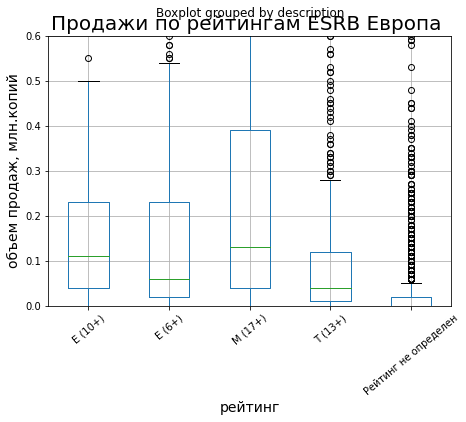

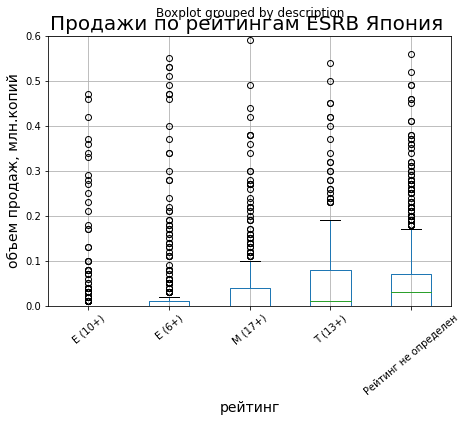

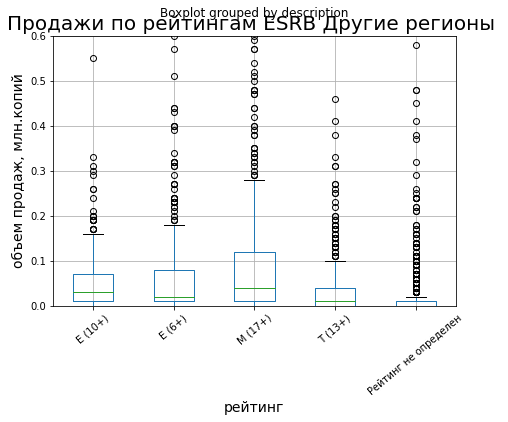

In [103]:
# область медианы
for name in regions:
    actual_period.query('platform in @platform_in_actual_period').boxplot(
                                     column= name, by='description',rot=40, figsize=(7,5))
    
    plt.title(f'Продажи по рейтингам ESRB {regions[name]} ', size=20)
    plt.ylim(0, 0.6)
    plt.xlabel('рейтинг', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()


__Во всех регионах кроме Японии наиболее продаваемыми в 2010-2016г были игры с рейтингом M(17+), затем в порядке убывания - E(6+), T(13+) и E(10+). Если посмотреть на медианные значения, то видим,что на первом месте по-прежнему остается категория M(17+), а у рейтинга T(13+) объем продаж оказывается сформирован в основном за счет нескольких успешных игр, а медианное значение -самое низкое из рассматриваемых категорий.__

__Японский рынок отличается. В абсолютном значении наибольшие продажи за 2010-2016г принесли игры категории E(6+), а затем уже T(13+), M(17+) и E(10+). Но на боксплоте видно, что медианы продаж всех категорий на нуле, то есть практически все объемы продаж сформированы за счет выбросов. То есть японский рынок- непредсказуем , но есть некоторая тенденция в предпочтениях игр категории E(6+), и они отличаются от остального мирового рынка.__

### Проверьте гипотезы

__Для проверки гипотез сравним данные за актуальный период, которые сохранены в переменной actual_period.
Для анализа будем использовать t-критерий Стьюдента, поскольку сравниваемые выборки независимы между собой.
Поскольку оценки имеют фиксированные шкалы, удалять выбросы не будем, но очистим данные от пропусков.__

__Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Сформулируем гипотезы:__

__Н0: средние пользовательские рейтинги платформ Xbox One и PC равны
Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны__

In [104]:
# выборки пользовательских рейтингов по платформам, очищенные от пропусков:
test_XOne = actual_period.query('platform == "XOne" and user_score.notna()')['user_score']
test_PC = actual_period.query('platform == "PC" and user_score.notna()')['user_score']

In [105]:
alpha = 0.05
results = st.ttest_ind(test_PC,test_XOne)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


`p-значение: 0.7118379176645055
Не получилось отвергнуть нулевую гипотезу`

__С вероятностью в 94% такой результат может быть получен случайно. Это слишком большое значение, которое гораздо больше установленного нами уровня значимости. Следовательно, с очень большой долей вероятности значимых различий между средними пользовательскими рейтингами нет.__
__Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не опровергнута__

__Средние пользовательские рейтинги жанров Action и Sports разные
Сформулируем гипотезы:
Н0: средние пользовательские рейтинги жанров Action и Sport равны
Н1: средние пользовательские рейтинги жанров Action и Sport не равны__

In [106]:
#выборки пользовательских рейтингов по платформам, очищенные от пропусков:
test_Action = actual_period.query('genre == "Action" and user_score.notna()')['user_score']
test_Sports = actual_period.query('genre == "Sports" and user_score.notna()')['user_score']

In [107]:
alpha = 0.05
results = st.ttest_ind(test_Action, test_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


`p-значение: 5.432020949551562e-19
Отвергаем нулевую гипотезу`

__Разница не случайна, есть значимые различия между выборками, следовательно средние пользовательские рейтинги отличаются.
Средние пользовательские рейтинги жанров Action и Sports разные.__

__Общий вывод__

__Представленные для анализа данные содержат информацию исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за 1980-2016 годы.__

__В результате предобработки данных:__
- наименования стоблцов приведены к нижнему регистру
- удалены строки с пропусками данных в столбцах name и rating (2 строки), year_of_release (269 строк)
- значения user_score, равные 'tbd' (To Be Determined) изменено на 0
- пропуски значений столбца rating заменены на значение 'no rating'
- подсчитаны и сохранены в столбце total_sales суммарные продажи во всех регионах.

__Пропуски значений столбца user_score и critic_score оставлены без изменений во избежание искажений результатов корреляционного анализа и стат-тестов.__

__Результат анализа:__

__Полный цикл жизни платформы (на примере топ-5) составляет в среднем 11 лет. Распределение несколько отличается и зависит, скорее всего, от периода, в котором платформа была запущена и скорости разработки новых платформ с инновациями. Но мы видим закономерность- резкий всплеск продаж через год, 5-летний (в среднем) пик, и спад, растянутый на 4-5 лет.
Топ-5 платформ за исследуемое время : PS2, X360, PS3, Wii, DS. Это платформы тройки лидеров- Sony, Nintendo и Microsoft. Для прогноза наиболее перспективной платформы на 2017 год был выбран актуальный период исходя из среднего периода жизни платфорты в 7 лет.
Рынок компьютерных игр, который начал расти в начале 90-х и достиг своего пика в 2008-2009 годах, к концу 2016 года находится на спаде. Возможно из-за пресыщения , возможно из-за отсутствия существенных инноваций, которые дали бы толчок развитию нового скачка. Перспективных новых платформ, которые показывали бы тенденцию к росту, нет, поэтому стоит остановиться на тех, кто относительно молод и показывает наибольшие из имеющихся объемы продаж: это PS4 , XOne и 3DS. До появления новой платформы они позволят магазину поддерживать бюджет.
При планировании продаж необходимо учитывать следующие факторы:__
- объемы продаж зависят и от оценок пользователей, и от оценок критиков: она четко прослеживается в области высоких оценок, особенно при рассмотрении оценок критиков.

__Наиболее перспективными для составления прогноза являются игровые жанры Shooter, Sports и Role-Playing, которые показывают более стабильные, высокие и предсказуемые значения продаж.
рынок компьютерных игр разных регионов имеет свои особенности, а именно:
Мировой рынок, за исключением Японии, предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS3, PS4) и Nintendo (Wii). Япония предпочитает отечественные разработки от Sony (PS3, PSV, PS4) и Nintendo (3DS, Wii).
Самые популярные жанры практически во всех регионах -Action, Shooter, Sports, Role-Playing и Misc. В Японии на первом месте стоят продажи Role-Playing, Action и Misc, кроме этого в стране восходящего солнца любят Platform и Shooter. Многие годы обособленности от остального мира и культура, на которую менее всего оказывало влияние мировое сообщество, сказывается и на играх.
Во всех регионах кроме Японии наиболее продаваемыми являются игры с рейтингом 17+. В Японии наибольшие продажи в первую очередь приносят игры категории 6+, но японский рынок непредсказуем, и все объемы продаж сформированы за счет отдельных, очень хорошо продаваемых игр. Большинство не продается вовсе.
Были проведены статистические t-тесты для проверки гипотез по сравнению пользовательских рейтингов платформ Xbox One и PC, а также жанров Action и Sports. Результаты тестов:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
Средние пользовательские рейтинги жанров Action и Sports различаются.__